In [208]:
# import all needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
# open the cleaned file

sharks = pd.read_csv('../data/sharks_clean.csv')

In [210]:
sharks.sample(5)

,Case Number,Date,Year,Type,Country,Area,Activity,Age,Fatal (Y/N),Sex,Month
1906,1954.09.15,15-Sep-1954,1954,Unprovoked,HONG KONG,unknown,Swimming,20,Y,M,Sep
255,2014.11.08,08-Nov-2014,2014,Unprovoked,USA,Florida,Surfing,18,N,M,Nov
1897,1955.07.23,23-Jun-1955,1955,Unprovoked,USA,Rhode Island,Wading,13,N,M,Jun
1639,1972.08.29,29-Aug-1972,1972,Unprovoked,USA,Florida,Surfing,15,N,M,Aug
1618,1974.04.04,04-Apr-1974,1974,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Surfing,17,N,M,Apr


In [337]:
# Configuration for Seaborn

sns.set_context("paper")
sns.set(rc={"figure.figsize": (10.,4.)})
sns.set(font_scale=0.8)
sns.set_style("darkgrid")
sns.set_palette("Pastel2", n_colors=3, color_codes=False)


## Hypothesis 1: 
## Shark attacks are more common in the recent years.
### - based on a general presumption, that this could be due to global warming (and higher waters temperature)
### - the attacks might appear more 'common' simply because the occurences are more commonly registered
### - finding: in the recent years, smaller percentage of attacks have been fatal. This could be due to stricter beach controls recently, or perhaps in the past only fatal attacks were being tracked. These are all presumptions and would need deeper research.


In [212]:
# Only work with unprovoked attacks

sharks = sharks[sharks['Type'].str.contains('Unprovoked') == True]
sharks

,Case Number,Date,Year,Type,Country,Area,Activity,Age,Fatal (Y/N),Sex,Month
0,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,11,N,F,Jun
1,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Swimming,18,Y,M,Jun
2,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,52,N,M,May
3,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,Walking,15,N,M,May
4,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,Standing,12,N,M,May
...,...,...,...,...,...,...,...,...,...,...,...
2153,1848.08.31,31-Aug-1848,1848,Unprovoked,USA,Maryland,Swimming,15,N,M,Aug
2154,1847.07.19,19-Jul-1847,1847,Unprovoked,GREECE,Corfu,Swimming,19,Y,M,Jul
2155,1842.07.13,13-Jul-1842,1842,Unprovoked,USA,New Jersey,Swimming,15,N,M,Jul
2156,1817.05.11,11-May-1817,1817,Unprovoked,SRI LANKA,Western Province,Swimming,22,Y,M,May


In [213]:
# Check how many Years there are -> too many for visualization.

sharks.groupby("Year").sum()

,Age
Year,
1703,19
1817,22
1842,15
1847,19
1848,15
...,...
2014,1611
2015,2446
2016,2429


In [214]:
# Apply new column to the dataframe, with Years grouped by Decades, for easier visualization.
# lambda: ground division, multiplied by ten

sharks['Decade'] = sharks['Year'].apply(lambda x: x//10*10)
sharks

,Case Number,Date,Year,Type,Country,Area,Activity,Age,Fatal (Y/N),Sex,Month,Decade
0,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,11,N,F,Jun,2010
1,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Swimming,18,Y,M,Jun,2010
2,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,52,N,M,May,2010
3,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,Walking,15,N,M,May,2010
4,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,Standing,12,N,M,May,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
2153,1848.08.31,31-Aug-1848,1848,Unprovoked,USA,Maryland,Swimming,15,N,M,Aug,1840
2154,1847.07.19,19-Jul-1847,1847,Unprovoked,GREECE,Corfu,Swimming,19,Y,M,Jul,1840
2155,1842.07.13,13-Jul-1842,1842,Unprovoked,USA,New Jersey,Swimming,15,N,M,Jul,1840
2156,1817.05.11,11-May-1817,1817,Unprovoked,SRI LANKA,Western Province,Swimming,22,Y,M,May,1810


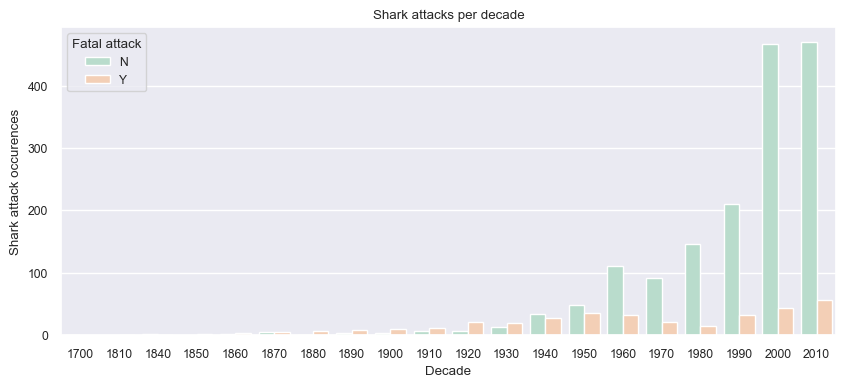

In [406]:
# Countplot to analyse attacks by decade
# Add hue by fatality

# There's more overall attacks in the recent years.
# There seems to be no significant difference in the number of FATAL attacks.
# However, the attacks seem to be less fatal in the recent years, compared to overall attacks.

sns.countplot(x='Decade', data=sharks, hue='Fatal (Y/N)');
plt.title("Shark attacks per decade")
plt.ylabel("Shark attack occurences")
plt.legend(loc='upper left', title='Fatal attack');

plt.savefig('../images/shark_attacks_decade.png', bbox_inches = 'tight', dpi=1000)


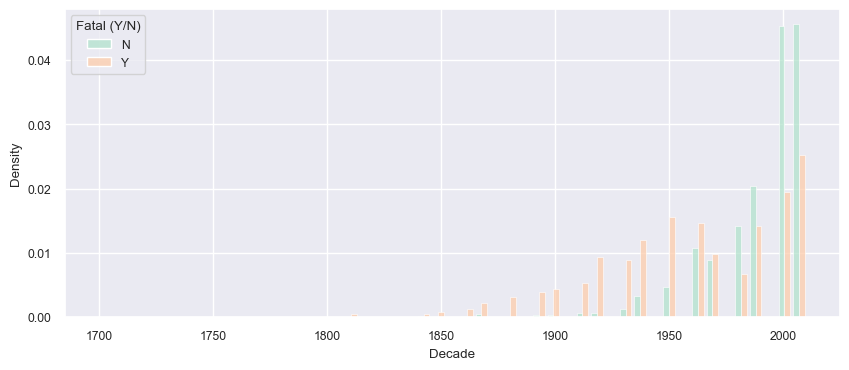

In [351]:
# Histplot with density, to check frequency of fatal vs. non-fatal attacks.
# Confirmed, the attacks are less fatal in the recent years.

# I'm not familiar enough with density, so below I also made frequency+catplot.

fatality = sns.histplot(x = sharks['Decade'], hue=sharks['Fatal (Y/N)'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

fatality.set(xticks=([1700, 1750, 1800, 1850, 1900, 1950, 2000]));


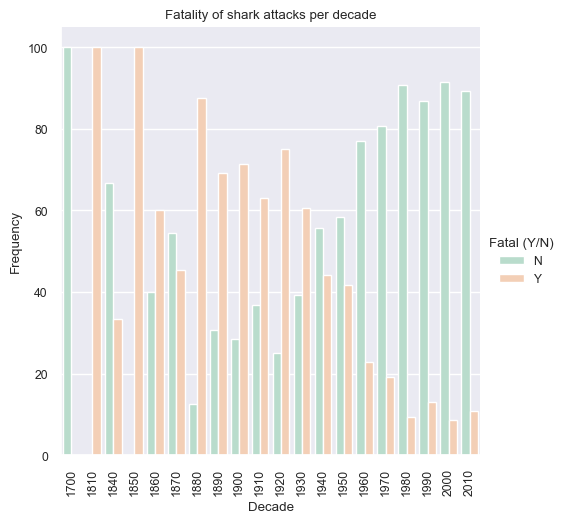

In [407]:
# check frequency of fatal vs. non-fatal attacks.
# catplot
# Confirmed, the attacks are less fatal in the recent decades.

(sharks
 .groupby('Decade')['Fatal (Y/N)']
 .value_counts(normalize=True)
 .mul(100)
 .rename('Frequency')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='Decade', y='Frequency', hue='Fatal (Y/N)', kind='bar')
)

plt.xticks(rotation=90)
plt.title("Fatality of shark attacks per decade");

plt.savefig('../images/shark_attacks_decade_fatality.png', bbox_inches = 'tight', dpi=1000)


## Hypothesis 2: 
## Occurences of attacks are more common in warm waters:
### - in certain locations
### - in warmer months, when more plankton is present in the waters
### - attacks are more fatal in certain countries (oceans)

In [218]:
# Check how many Areas there are -> too many for visualization.

area_count = sharks.Area.value_counts()
area_count

Florida                        555
New South Wales                162
KwaZulu-Natal                   92
Hawaii                          89
Eastern Cape Province           87
                              ... 
South Ch'ungch'ong Province      1
Bahia                            1
Santiago de Cuba Province        1
Camaguey Province                1
Southwest coast                  1
Name: Area, Length: 256, dtype: int64

In [219]:
# Make a subset only with Areas with 50+ attacks.

subset_area = sharks[sharks.Area.isin(area_count[area_count > 50].index)]

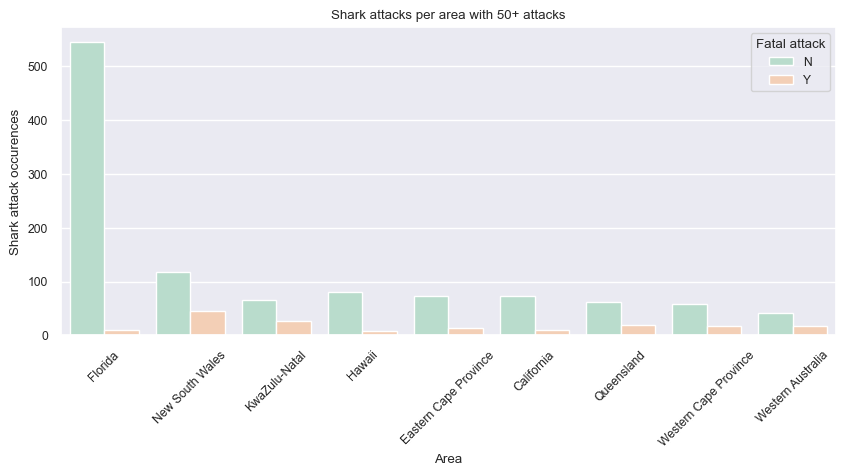

In [408]:
# countplot

sns.countplot(x='Area', hue='Fatal (Y/N)', data=subset_area, order=subset_area['Area'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Shark attacks per area with 50+ attacks")
plt.ylabel("Shark attack occurences")
plt.legend(loc='upper right', title='Fatal attack');

plt.savefig('../images/shark_attacks_area50.png', bbox_inches = 'tight', dpi=1000)

In [221]:
# Check occurences of attacks per country.

sharks.Country.value_counts()

USA                916
AUSTRALIA          377
SOUTH AFRICA       256
BRAZIL              46
BAHAMAS             39
                  ... 
SOMALIA              1
Fiji                 1
SOUTH CHINA SEA      1
WESTERN SAMOA        1
SRI LANKA            1
Name: Country, Length: 92, dtype: int64

In [222]:
sharks.Country.unique()

array(['USA', 'BRAZIL', 'COSTA RICA', 'AUSTRALIA', 'MALDIVES', 'THAILAND',
       'BAHAMAS', 'SOUTH AFRICA', 'ECUADOR', 'SPAIN', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'MEXICO', 'PHILIPPINES',
       'INDONESIA', 'CHINA', 'COLUMBIA', 'NEW CALEDONIA', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'FRENCH POLYNESIA', 'NEW ZEALAND',
       'ISRAEL', 'DIEGO GARCIA', 'SEYCHELLES', 'JAMAICA', 'NIGERIA',
       'TONGA', 'FIJI', 'SCOTLAND', 'KENYA', 'PAPUA NEW GUINEA', 'RUSSIA',
       'TURKS & CAICOS', 'SAMOA', 'DOMINICAN REPUBLIC', 'SOUTH KOREA',
       'MALTA', 'VIETNAM', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)',
       'PANAMA', 'CUBA', 'CROATIA', 'ST. MAARTIN', 'GRAND CAYMAN',
       'URUGUAY', 'VENEZUELA', 'OKINAWA', 'TANZANIA', ' TONGA',
       'MARSHALL ISLANDS', 'MAURITIUS', 'HONG KONG', 'SOMALIA',
       'EL SALVADOR', 'VANUATU', 'Fiji', 'SOUTH CHINA SEA',
       'WESTERN SAMOA', 'BRITISH ISLES', 

In [223]:
# Separate Countries by hemisphere (I did this manually)
# Presumption: if the country is divided, but mostly in one hemisphere, that is the selected one
# General names, like 'Pacific ocean' or 'Atlantic ocean' fall into 'Other'

north = ['USA', 'COSTA RICA', 'MALDIVES', 'THAILAND',
       'BAHAMAS', 'SPAIN', 'JAPAN', 'EGYPT', 'MEXICO',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES', 'CHINA', 'COLUMBIA', 'ARUBA',
       'PUERTO RICO', 'ISRAEL',
       'PALESTINIAN TERRITORIES', 'JAMAICA', 'NIGERIA',
         'SCOTLAND', 'TAIWAN', 'DOMINICAN REPUBLIC', 'RUSSIA', 'TURKS & CAICOS',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'GUAM', 'AZORES', 'CUBA',
       'CROATIA', 'ENGLAND', 'NORWAY', 'ST. MAARTIN', 'GRAND CAYMAN', 'VENEZUELA', 'OKINAWA', 'HONG KONG', 
         'SOMALIA', 'EL SALVADOR', 'SOUTH CHINA SEA', 'ITALY', 'BRITISH ISLES', 'PALAU',
       'GRENADA', 'BERMUDA', 'TURKEY', 'SINGAPORE', 'NEW BRITAIN',
       'NEW GUINEA', 'NORTH PACIFIC OCEAN', 'GREECE', 'BRITISH WEST INDIES',
       'NORTH SEA', 'INDIA', 'IRAN', 'CAPE VERDE', 'BARBADOS', 'NICARAGUA',
       'EGYPT ', 'YEMEN ', 'SRI LANKA']

In [224]:
south = ['BRAZIL', 'AUSTRALIA', 'SOUTH AFRICA', 'ECUADOR', 'ST HELENA, British overseas territory', 'REUNION', 'INDONESIA',
        'NEW ZEALAND', 'FRENCH POLYNESIA', 'NEW CALEDONIA', 'MOZAMBIQUE', 'MAURITIUS', 'DIEGO GARCIA', 'SEYCHELLES', 'TONGA', 
        'FIJI', 'KENYA', 'PAPUA NEW GUINEA','SAMOA', 'URUGUAY','TANZANIA',' TONGA', 'MARSHALL ISLANDS',
        'VANUATU', 'Fiji', 'WESTERN SAMOA', 'MICRONESIA', 'FEDERATED STATES OF MICRONESIA', 'AMERICAN SAMOA', 'ARGENTINA']



In [225]:
# function to define hemispheres

def country_to_hemisphere(x):
    if x in north:
        return 'North' 
    if x in south:
        return 'South'
    else:
        return 'Other'


In [226]:
country_to_hemisphere('test')

'Other'

In [227]:
# lambda to create a new column Hemisphere

sharks['Hemisphere'] = sharks['Country'].apply(lambda x: country_to_hemisphere(x))
sharks

,Case Number,Date,Year,Type,Country,Area,Activity,Age,Fatal (Y/N),Sex,Month,Decade,Hemisphere
0,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,11,N,F,Jun,2010,North
1,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Swimming,18,Y,M,Jun,2010,South
2,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,52,N,M,May,2010,North
3,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,Walking,15,N,M,May,2010,North
4,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,Standing,12,N,M,May,2010,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,1848.08.31,31-Aug-1848,1848,Unprovoked,USA,Maryland,Swimming,15,N,M,Aug,1840,North
2154,1847.07.19,19-Jul-1847,1847,Unprovoked,GREECE,Corfu,Swimming,19,Y,M,Jul,1840,North
2155,1842.07.13,13-Jul-1842,1842,Unprovoked,USA,New Jersey,Swimming,15,N,M,Jul,1840,North
2156,1817.05.11,11-May-1817,1817,Unprovoked,SRI LANKA,Western Province,Swimming,22,Y,M,May,1810,North


In [415]:
sharks.Hemisphere.value_counts()

North    1143
South     839
Other       2
Name: Hemisphere, dtype: int64

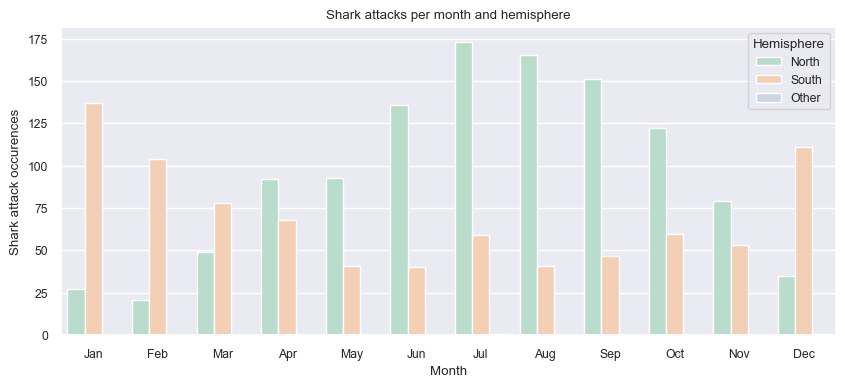

In [409]:
# countplot to see occurences of attacks by months and hemispheres
# looking at the South Hem., most attacks happen in the months between Dec-Mar (summer months)
# looking at the North Hem., most attacks happen in the months between Jun-Sep (summer months)
# looking at the whole year, overall there's more attacks in S.Hem. Dec-Mar, and more attacks in N.Hem. Apr-Nov


sns.countplot(x='Month', hue='Hemisphere', data=sharks, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

plt.title("Shark attacks per month and hemisphere")
plt.ylabel("Shark attack occurences");

plt.savefig('../images/shark_attacks_month_hemisphere.png', bbox_inches = 'tight', dpi=1000)


In [230]:
# check shark attacks per country
# for easier visualization, only consider countries with +20 attacks

country_count = sharks.Country.value_counts()

In [231]:
# subset of countries with 20+ attacks

subset_country = sharks[sharks.Country.isin(country_count[country_count > 20].index)]

In [232]:
# check the size of the subset
# it's large enough

subset_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 2155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Case Number  1716 non-null   object
 1   Date         1716 non-null   object
 2   Year         1716 non-null   int64 
 3   Type         1716 non-null   object
 4   Country      1716 non-null   object
 5   Area         1716 non-null   object
 6   Activity     1716 non-null   object
 7   Age          1716 non-null   int64 
 8   Fatal (Y/N)  1716 non-null   object
 9   Sex          1716 non-null   object
 10  Month        1716 non-null   object
 11  Decade       1716 non-null   int64 
 12  Hemisphere   1716 non-null   object
dtypes: int64(3), object(10)
memory usage: 187.7+ KB


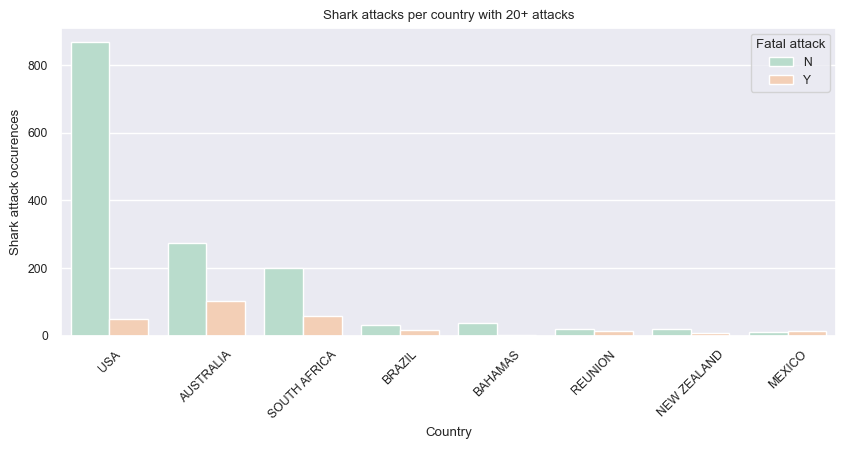

In [410]:
# countplot
# in some countries, frequency of fatal attacks (vs. non-fatal) seems to be higher than in others

sns.countplot(x='Country', hue='Fatal (Y/N)', data=subset_country, order=subset_country['Country'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Shark attacks per country with 20+ attacks")
plt.ylabel("Shark attack occurences")
plt.legend(loc='upper right', title='Fatal attack');

plt.savefig('../images/shark_attacks_country20.png', bbox_inches = 'tight', dpi=1000)


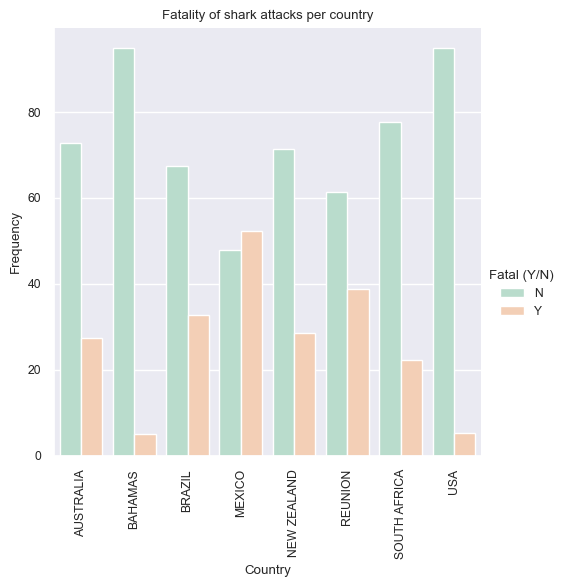

In [414]:
# check frequency of fatal vs. non-fatal attacks.
# catplot
# Chances of a shark attack being more fatal, are higher in some countries.

(subset_country
 .groupby('Country')['Fatal (Y/N)']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='Country', y='percent', hue='Fatal (Y/N)', kind='bar')
)

plt.title("Fatality of shark attacks per country")
plt.ylabel('Frequency')
plt.xticks(rotation=90);

plt.savefig('../images/shark_attacks_country_fatality.png', bbox_inches = 'tight', dpi=1000)


## 3. Some activities are more fatal than others.

### Even though the most common activity resulting in shark attacks is surfing, the most fatal activity is swimming.


In [238]:
# check shark attacks per activity

activity_count = sharks.Activity.value_counts()
activity_count

Surfing                           705
Swimming                          452
Spearfishing                      148
Wading                             90
Standing                           64
Snorkeling                         57
Body boarding                      54
Bathing                            43
Fishing                            37
Body surfing                       37
Scuba diving                       34
Diving                             33
Swimming                           29
Treading water                     26
Boogie boarding                    18
Free diving                        17
Windsurfing                        13
Walking                            12
Boogie Boarding                    10
Floating                            9
Free diving for abalone             7
Diving for abalone                  6
Surf-skiing                         6
Surf skiing                         6
Paddle boarding                     6
Surfing                             5
Playing     

In [241]:
# for easier visualization, only consider activities with +50 attacks
# subset

subset_activity = sharks[sharks.Activity.isin(activity_count[activity_count > 50].index)]
subset_activity


,Case Number,Date,Year,Type,Country,Area,Activity,Age,Fatal (Y/N),Sex,Month,Decade,Hemisphere
0,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,11,N,F,Jun,2010,North
1,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Swimming,18,Y,M,Jun,2010,South
4,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,Standing,12,N,M,May,2010,North
6,2018.05.13.b,13-May-2018,2018,Unprovoked,USA,South Carolina,Swimming,10,N,M,May,2010,North
8,2018.04.25.a,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,60,N,M,Apr,2010,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,1848.08.31,31-Aug-1848,1848,Unprovoked,USA,Maryland,Swimming,15,N,M,Aug,1840,North
2154,1847.07.19,19-Jul-1847,1847,Unprovoked,GREECE,Corfu,Swimming,19,Y,M,Jul,1840,North
2155,1842.07.13,13-Jul-1842,1842,Unprovoked,USA,New Jersey,Swimming,15,N,M,Jul,1840,North
2156,1817.05.11,11-May-1817,1817,Unprovoked,SRI LANKA,Western Province,Swimming,22,Y,M,May,1810,North


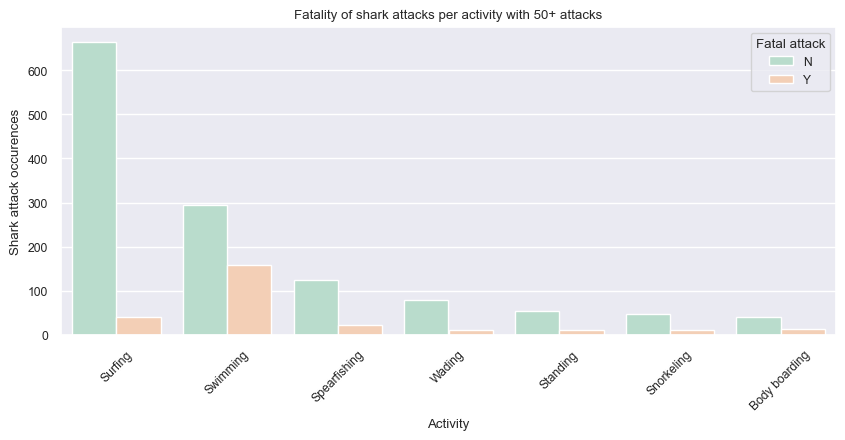

In [405]:
# countplot for comparison

sns.countplot(x='Activity', hue='Fatal (Y/N)', data=subset_activity, order=subset_activity['Activity'].value_counts().index)

plt.title('Fatality of shark attacks per activity with 50+ attacks')
plt.ylabel("Shark attack occurences")
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='Fatal attack');

plt.savefig('../images/shark_attacks_activity50.png', bbox_inches = 'tight', dpi=1000)


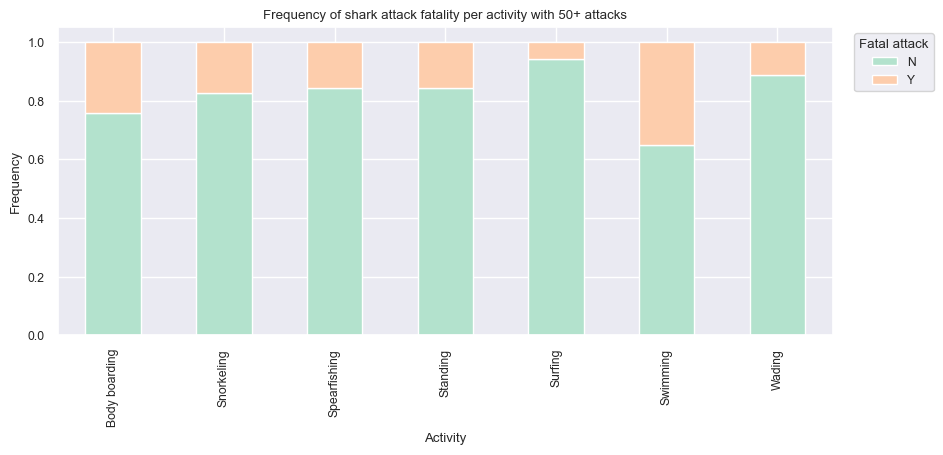

In [404]:
# what are the odds of attack being fatal, depending on the activity
# frequency with pandas crosstab

(pd.crosstab(subset_activity['Activity'],subset_activity['Fatal (Y/N)'], 
normalize='index').plot.bar(stacked=True))

plt.title('Frequency of shark attack fatality per activity with 50+ attacks')
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Fatal attack');

plt.savefig('../images/shark_attacks_activity_fatality.png', bbox_inches = 'tight', dpi=1000)


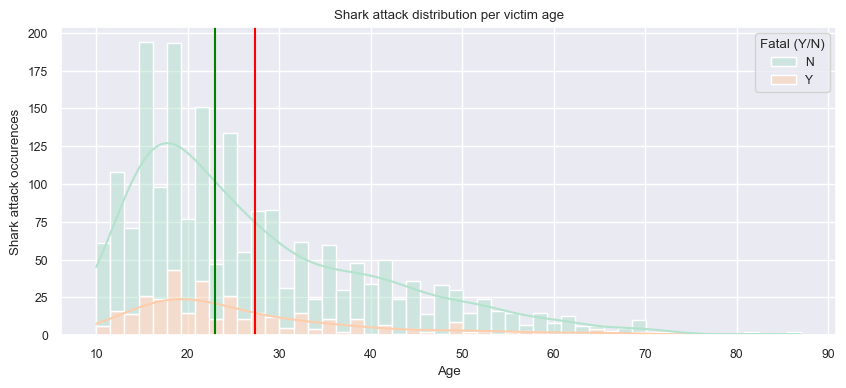

In [412]:
# check attack by population age
# histplot

# it seems that there are more attacks among younger population
# proportionally, also more fatal attacks among younger population
# on average, more common below 25 y.o.

chart = sns.histplot(x='Age', hue='Fatal (Y/N)', data=sharks, bins=50, multiple='stack',kde=True);

chart.axvline(x=sharks.Age.mean(), c="red", label="mean")
chart.axvline(x=sharks.Age.median(), c="green", label="median")

plt.title('Shark attack distribution per victim age')
plt.ylabel("Shark attack occurences");

plt.savefig('../images/shark_attacks_age_dist.png', bbox_inches = 'tight', dpi=1000)


In [391]:
# compare attacks by age and sex
# check the values

sharks.Sex.value_counts ()

M          1700
F           271
unknown      13
Name: Sex, dtype: int64

In [389]:
# remove 'unknown' sex, to keep only M and F

subset_sex = sharks[sharks['Sex'].str.contains('unknown') == False]


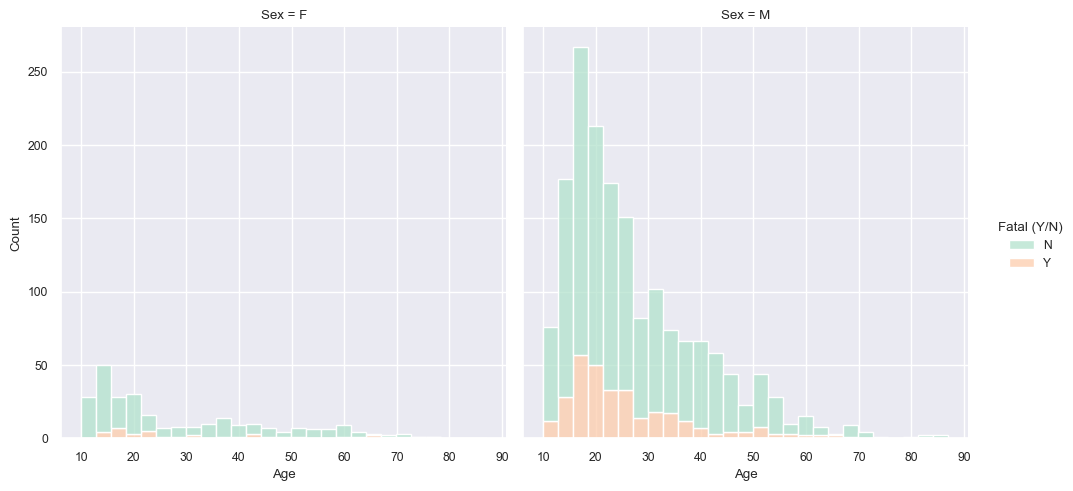

In [417]:
# compare attacks by age and sex
# substantially more attacks among younger and male population

sns.displot(subset_sex, x="Age", col="Sex", hue='Fatal (Y/N)', multiple='stack');

plt.savefig('../images/shark_attacks_age_sex.png', bbox_inches = 'tight', dpi=1000)


In [ ]:
# The end. :) 